データサイエンス特別PG データサイエンス特論 第12回 課題

In [58]:
# google colab で実行する場合は下記のコメントアウトを外して実行する
# ! wget https://github.com/KHiraGit/sudspg_ds/raw/main/ds07_temp_power_exercise.xlsx
# ! pip install japanize-matplotlib

In [59]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import openpyxl
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [60]:
# 対象データを読み込み、データフレームに格納
weather_df = pd.read_excel('ds07_temp_power_exercise.xlsx', 
                           sheet_name='2020熊谷市気象データ_data', skiprows=[0,1,2],
                           names=['年月日', '平均気温', '', '', '最高気温', '', '', '', '', '最低気温', '', '', '', '', 
                           '降水量', '', '', '', '日照時間', '', '', '', '降雪量', '', '', '', '平均風速', '', '', 
                           '平均蒸気圧', '', '', '平均湿度', '', '', '平均現地気圧', '', '', '', '', '', '天気概況', '', ''])

# 分析対象期間のデータを抽出
year = 2020
month = 7
data = ['平均気温', '最高気温', '最低気温', '降水量', '日照時間', '降雪量', '平均風速', '平均蒸気圧', '平均湿度', '平均現地気圧'] 
target = '天気概況'
weather_data = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                        & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][data].values
weather_target = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                            & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][target].values

# データを標準化
stdsc = StandardScaler()
weather_data = stdsc.fit_transform(weather_data)

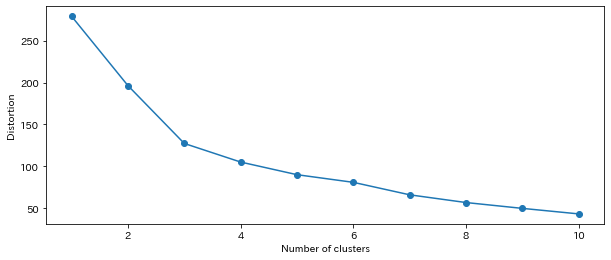

In [61]:
# クラスタ数を決定するために距離の総計を確認
distortions = []
for i  in range(1,11):
    km = KMeans(n_clusters=i, init='random', max_iter=30, random_state=1)
    km.fit(weather_data)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,4))
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

cluster 0 ['曇後時々雨', '曇一時雨', '曇後時々雨', '雨後曇', '曇時々雨', '曇後一時雨', '雨時々曇', '雨時々曇', '雨時々曇', '曇一時雨']
cluster 1 ['晴時々曇', '曇時々晴', '曇一時雨後晴', '曇一時晴、雷を伴う', '曇時々雨一時晴、雷を伴う', '曇時々雨後晴']
cluster 2 ['曇', '曇後一時雨一時晴', '雨時々曇', '曇後時々雨', '曇時々雨、雷を伴う', '雨時々曇', '雨後時々曇', '雨時々曇', '曇時々雨', '雨後一時曇', '雨時々曇', '雨後時々曇', '雨時々曇', '雨時々曇', '雨時々曇']


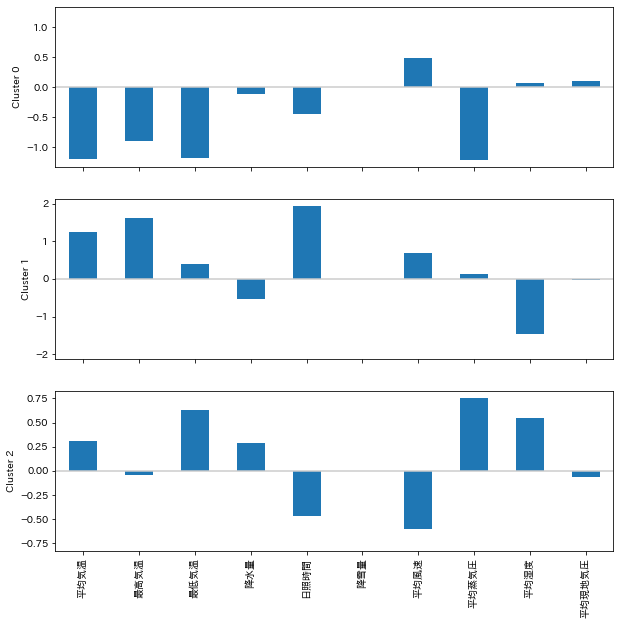

In [62]:
# クラスタ数を決めて、kmeans法でクラスタリング
_n_cluster = 3
kmeans = KMeans(n_clusters=_n_cluster, max_iter=30, init="random", random_state=1)
cluster = kmeans.fit_predict(weather_data)

# 各クラスタの天気概況を確認
for i in range(_n_cluster):
    _weather_list = []
    for _cluster, _weather in zip(cluster, weather_target):
        if i == _cluster:
            _weather_list.append(_weather)
    print('cluster', i, _weather_list)

# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=data)
f, axes = plt.subplots(_n_cluster, 1, sharex=True, figsize=(10,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-maxPC, maxPC)

In [63]:
# 分析対象期間のデータを抽出
year = 2020
month = 8
data = ['平均気温', '最高気温', '最低気温', '降水量', '日照時間', '降雪量', '平均風速', '平均蒸気圧', '平均湿度', '平均現地気圧'] 
target = '天気概況'
weather_data = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                        & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][data].values
weather_target = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                            & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][target].values

# データを標準化
stdsc = StandardScaler()
weather_data = stdsc.fit_transform(weather_data)

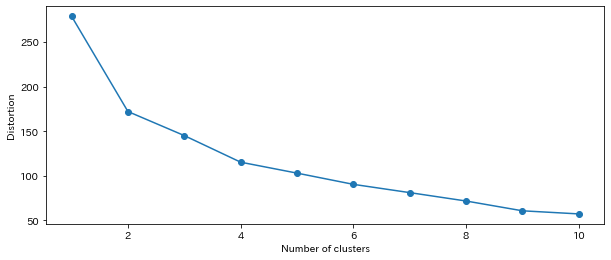

In [64]:
# クラスタ数を決定するために距離の総計を確認
distortions = []
for i  in range(1,11):
    km = KMeans(n_clusters=i, init='random', max_iter=30, random_state=1)
    km.fit(weather_data)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,4))
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

cluster 0 ['晴一時雨後曇', '曇時々晴', '晴時々曇', '曇', '曇時々晴一時雨、雷を伴う', '×', '雨時々曇後晴', '晴時々曇', '曇後一時晴']
cluster 1 ['晴一時曇', '晴時々曇', '曇時々晴', '曇時々晴', '曇時々晴', '曇時々晴', '晴', '晴後曇時々雨、雷を伴う', '晴時々曇、雷を伴う', '晴', '晴', '晴、雷を伴う', '晴時々曇、雷を伴う', '晴時々曇', '晴時々曇', '晴', '晴', '晴一時曇後一時雨', '曇時々晴一時雨、雷を伴う', '晴時々曇一時雨', '晴', '晴一時曇']


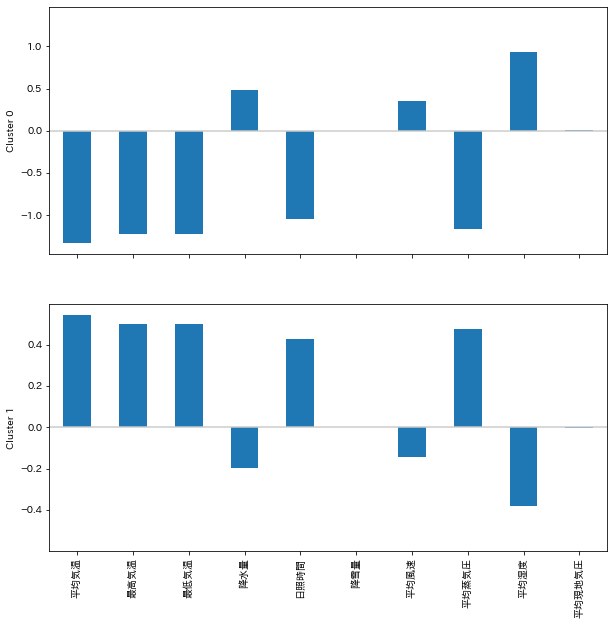

In [65]:
# クラスタ数を決めて、kmeans法でクラスタリング
_n_cluster = 2
kmeans = KMeans(n_clusters=_n_cluster, max_iter=30, init="random", random_state=1)
cluster = kmeans.fit_predict(weather_data)

# 各クラスタの天気概況を確認
for i in range(_n_cluster):
    _weather_list = []
    for _cluster, _weather in zip(cluster, weather_target):
        if i == _cluster:
            _weather_list.append(_weather)
    print('cluster', i, _weather_list)

# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=data)
f, axes = plt.subplots(_n_cluster, 1, sharex=True, figsize=(10,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-maxPC, maxPC)

In [66]:
# 2020年の1年分のデータを対象にする
weather_data = weather_df[data].values
weather_target = weather_df[target].values
# データを標準化
stdsc = StandardScaler()
weather_data = stdsc.fit_transform(weather_data)

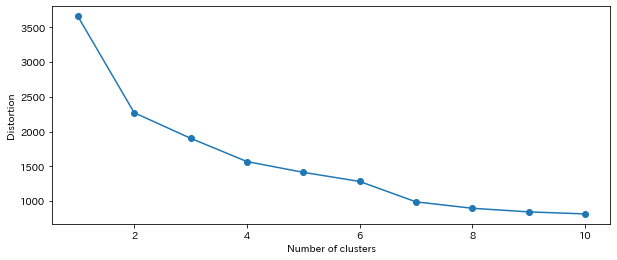

In [67]:
# クラスタ数を決定するために距離の総計を確認
distortions = []
for i  in range(1,11):
    km = KMeans(n_clusters=i, init='random', max_iter=30, random_state=1)
    km.fit(weather_data)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,4))
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

cluster 0 195
cluster 1 171


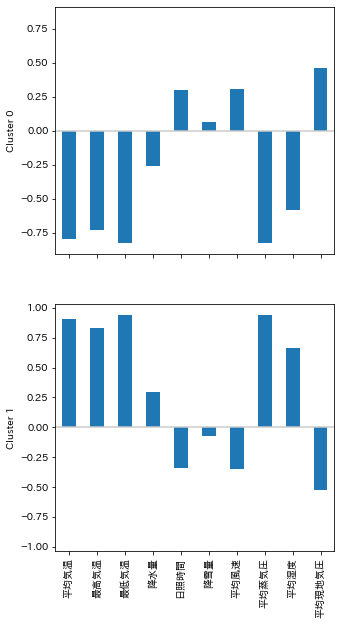

In [68]:
# クラスタ数を決めて、kmeans法でクラスタリング
_n_cluster = 2
kmeans = KMeans(n_clusters=_n_cluster, max_iter=30, init="random", random_state=1)
cluster = kmeans.fit_predict(weather_data)

# 各クラスタの日数を確認
for i in range(_n_cluster):
    _day = 0
    for _cluster in cluster:
        if i == _cluster:
            _day = _day + 1
    print('cluster', i, _day)

# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=data)
f, axes = plt.subplots(_n_cluster, 1, sharex=True, figsize=(5,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-maxPC, maxPC)

cluster 0 171
cluster 1 2
cluster 2 193


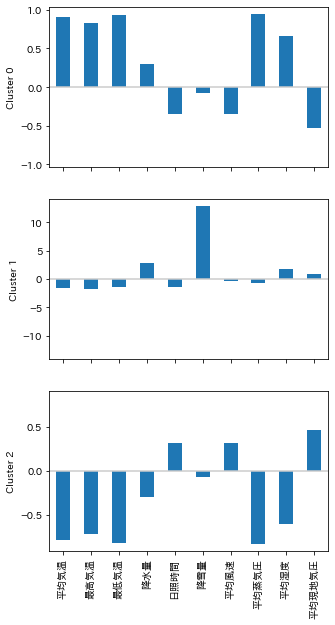

In [69]:
# クラスタ数を決めて、kmeans法でクラスタリング
_n_cluster = 3
kmeans = KMeans(n_clusters=_n_cluster, max_iter=30, init="random", random_state=1)
cluster = kmeans.fit_predict(weather_data)

# 各クラスタの日数を確認
for i in range(_n_cluster):
    _day = 0
    for _cluster in cluster:
        if i == _cluster:
            _day = _day + 1
    print('cluster', i, _day)
    
# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=data)
f, axes = plt.subplots(_n_cluster, 1, sharex=True, figsize=(5,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-maxPC, maxPC)

cluster 0 159
cluster 1 2
cluster 2 103
cluster 3 102


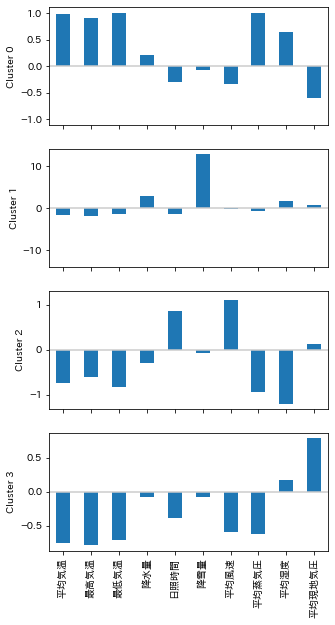

In [70]:
# クラスタ数を決めて、kmeans法でクラスタリング
_n_cluster = 4
kmeans = KMeans(n_clusters=_n_cluster, max_iter=30, init="random", random_state=1)
cluster = kmeans.fit_predict(weather_data)

# 各クラスタの日数を確認
for i in range(_n_cluster):
    _day = 0
    for _cluster in cluster:
        if i == _cluster:
            _day = _day + 1
    print('cluster', i, _day)
    
# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=data)
f, axes = plt.subplots(_n_cluster, 1, sharex=True, figsize=(5,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-maxPC, maxPC)

cluster 0 81
cluster 1 2
cluster 2 85
cluster 3 73
cluster 4 40
cluster 5 15
cluster 6 70


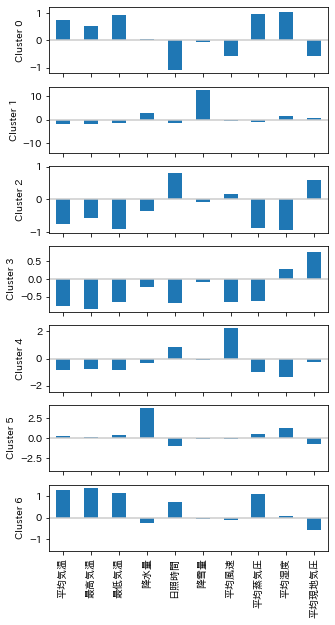

In [71]:
# クラスタ数を決めて、kmeans法でクラスタリング
_n_cluster = 7
kmeans = KMeans(n_clusters=_n_cluster, max_iter=30, init="random", random_state=1)
cluster = kmeans.fit_predict(weather_data)

# 各クラスタの日数を確認
for i in range(_n_cluster):
    _day = 0
    for _cluster in cluster:
        if i == _cluster:
            _day = _day + 1
    print('cluster', i, _day)
    
# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=data)
f, axes = plt.subplots(_n_cluster, 1, sharex=True, figsize=(5,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-maxPC, maxPC)

In [72]:
# 各クラスタの天気概況を確認
for i in range(_n_cluster):
    _weather_list = []
    for _cluster, _weather in zip(cluster, weather_target):
        if i == _cluster:
            _weather_list.append(_weather)
    print('cluster', i, f'({len(_weather_list)})', _weather_list)

cluster 0 (81) ['雨', '曇時々雨', '雨時々曇、雷を伴う', '曇時々雨一時晴', '曇後一時晴', '雨時々曇', '曇後時々雨', '曇時々雨', '曇時々雨', '曇後時々雨', '曇時々雨', '曇後時々雨', '曇後一時雨', '曇時々雨', '雨時々曇', '雨時々曇一時晴', '曇', '曇時々雨', '曇後一時雨一時晴', '曇一時雨', '雨時々曇', '曇', '曇後時々雨', '曇一時雨', '曇後一時雨一時晴', '雨時々曇', '曇後時々雨', '曇時々雨、雷を伴う', '雨時々曇', '雨後時々曇', '雨時々曇', '曇後時々雨', '雨後曇', '曇時々雨', '曇後一時雨', '雨時々曇', '雨時々曇', '曇時々雨', '曇時々雨一時晴、雷を伴う', '雨後一時曇', '雨時々曇', '雨時々曇', '雨時々曇', '雨時々曇', '雨時々曇', '曇一時雨', '曇時々雨後晴', '曇', '×', '曇後一時晴', '曇時々雨', '曇時々雨一時晴、雷を伴う', '雨後曇時々晴、雷を伴う', '曇時々雨、雷を伴う', '曇時々雨', '曇後時々雨', '曇一時晴', '曇一時晴', '曇時々雨一時晴', '曇後一時雨', '曇後時々雨', '雨時々曇', '曇時々雨', '曇後晴', '雨時々曇', '曇時々雨', '雨', '雨時々曇', '曇後一時雨一時晴、雷を伴う', '曇', '曇一時雨後時々晴', '曇一時晴', '曇時々雨', '雨後曇時々晴', '晴時々雨後曇', '曇後晴一時雨', '曇', '雨時々曇', '曇時々雨一時晴', '曇時々晴', '曇後一時晴']
cluster 1 (2) ['雨時々みぞれ', 'みぞれ時々雨一時曇']
cluster 2 (85) ['晴', '晴', '晴', '晴後一時曇', '晴', '晴一時曇', '晴後一時曇', '晴', '晴一時曇', '晴', '晴', '晴時々曇', '晴時々曇', '晴', '晴', '晴時々曇', '晴', '晴時々曇', '曇一時雨後晴', '晴', '晴', '晴一時曇', '晴時々曇', '晴時々曇', '晴', '晴時々曇', '曇時々晴', '晴後一時雨一時曇', '晴', '晴一時雨', '晴', '晴

cluster 0 88
cluster 1 11
cluster 2 149
cluster 3 2
cluster 4 23
cluster 5 28
cluster 6 65


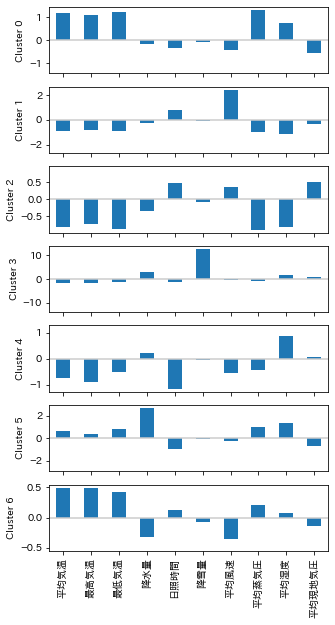

In [73]:
# 混合カウスモデルでクラスタリングを実行
_n_cluster = 7
clf = GaussianMixture(n_components=_n_cluster)
cluster = clf.fit_predict(weather_data)

# 各クラスタの日数を確認
for i in range(_n_cluster):
    _day = 0
    for _cluster in cluster:
        if i == _cluster:
            _day = _day + 1
    print('cluster', i, _day)

# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(clf.means_, columns=data)
f, axes = plt.subplots(_n_cluster, 1, sharex=True, figsize=(5,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-maxPC, maxPC)

In [74]:
# 各クラスタの天気概況を確認
for i in range(_n_cluster):
    _weather_list = []
    for _cluster, _weather in zip(cluster, weather_target):
        if i == _cluster:
            _weather_list.append(_weather)
    print('cluster', i, f'({len(_weather_list)})', _weather_list)

cluster 0 (88) ['晴後雨時々曇', '曇後時々雨', '曇時々雨', '曇時々雨一時晴', '晴時々曇', '曇時々晴後雨、雷を伴う', '曇時々晴後雨、雷を伴う', '曇後時々雨', '曇後一時雨', '雨時々曇', '雨時々曇一時晴', '曇', '曇時々雨', '曇後一時雨一時晴', '曇一時雨', '雨時々曇', '晴時々曇', '曇後時々雨', '曇後一時雨一時晴', '雨時々曇', '曇後時々雨', '雨時々曇', '雨後時々曇', '雨時々曇', '曇時々晴', '曇後時々雨', '雨後曇', '曇後一時雨', '雨時々曇', '雨時々曇', '曇一時雨後晴', '曇一時晴、雷を伴う', '曇時々雨', '曇時々雨一時晴、雷を伴う', '雨時々曇', '雨時々曇', '雨時々曇', '雨時々曇', '曇一時雨', '曇時々雨後晴', '晴一時雨後曇', '曇時々晴', '晴時々曇', '晴一時曇', '晴時々曇', '曇時々晴', '曇時々晴', '曇', '曇時々晴', '曇時々晴', '晴', '晴後曇時々雨、雷を伴う', '晴時々曇、雷を伴う', '晴', '晴', '晴、雷を伴う', '晴時々曇、雷を伴う', '晴時々曇', '晴時々曇', '晴', '晴', '×', '雨時々曇後晴', '晴時々曇', '晴一時曇後一時雨', '曇時々晴一時雨、雷を伴う', '晴時々曇一時雨', '晴', '晴一時曇', '曇後一時晴', '曇時々雨', '雨後曇時々晴、雷を伴う', '晴後曇一時雨', '晴後一時雨、雷を伴う', '曇一時雨', '曇後晴一時雨、雷を伴う', '曇後時々雨', '曇一時晴', '曇一時晴', '曇時々雨一時晴', '曇後一時雨', '曇後時々雨', '雨時々曇', '曇時々雨', '雨時々曇', '雨時々曇', '曇後一時雨一時晴、雷を伴う', '晴時々雨後曇']
cluster 1 (11) ['晴後時々曇', '晴一時曇', '晴', '晴時々曇一時雨', '晴', '晴後雨時々曇、雷を伴う', '晴後一時雨一時曇', '晴', '曇時々晴一時雨、雷を伴う', '晴', '曇時々晴、みぞれを伴う']
cluster 2 (149) ['晴', '晴', '晴', '晴', '晴', '晴後一時曇', '晴

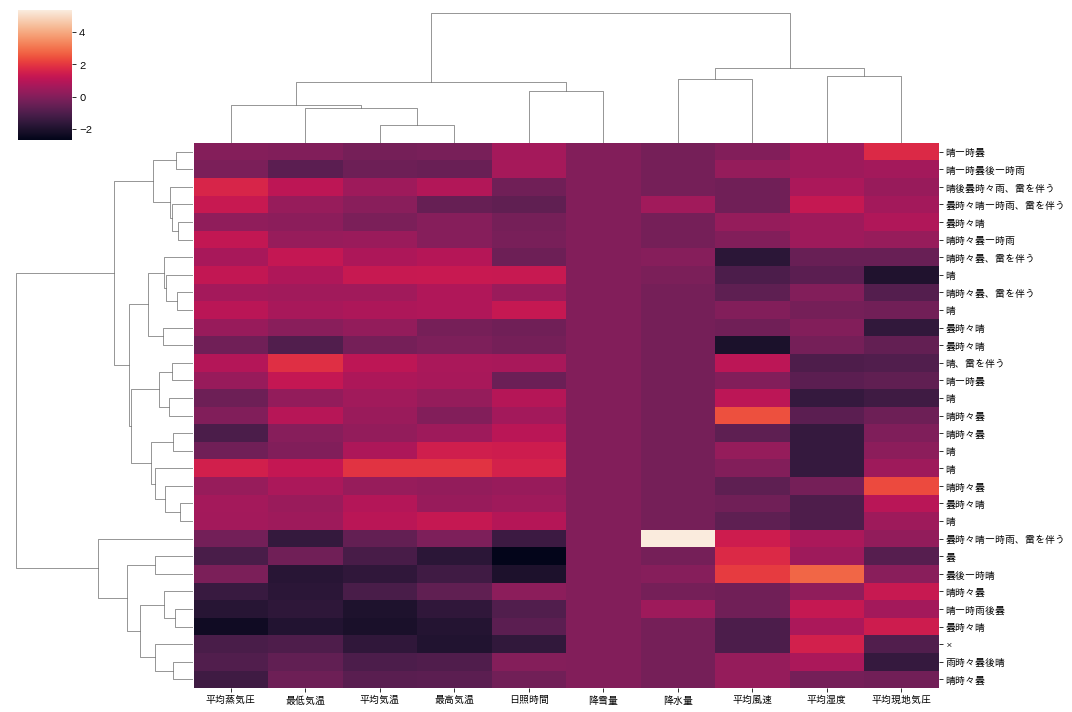

In [75]:
year = 2020
month = 8
data = ['平均気温', '最高気温', '最低気温', '降水量', '日照時間', '降雪量', '平均風速', '平均蒸気圧', '平均湿度', '平均現地気圧'] 
target = '天気概況'
weather_data = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                        & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][data].values
weather_target = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                            & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][target].values

# データを標準化
stdsc = StandardScaler()
weather_data = stdsc.fit_transform(weather_data)

# デンドログラムとヒートマップを組み合わせたクラスターマップを出力
# データを標準化 (平均0,分散1に変換)
scaler = StandardScaler()
iris_data_df = scaler.fit_transform(weather_data)
_df = pd.DataFrame(iris_data_df, index=weather_target, columns=data)
sns.clustermap(_df, method='ward', metric='euclidean', figsize=(15, 10))
plt.show()